In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.patches import Circle
import random as rd

In [2]:
def generar_puntos_circunferencia_escotoma(radio, num_puntos, centro=(0, 0)):
    angulos = np.linspace(0,  2*np.pi, num_puntos, endpoint=False)  # Ángulos distribuidos uniformemente
    x = centro[0] + radio * np.cos(angulos)  # Coordenadas X
    y = centro[1] + radio * np.sin(angulos)  # Coordenadas Y
    return x, y

def generar_puntos_circunferencia(radio,lim1, lim2, num_puntos, centro=(0, 0)):
    angulos = np.linspace(lim1,lim2, num_puntos, endpoint=False)  # Ángulos distribuidos uniformemente
    x = centro[0] + radio * np.cos(angulos)  # Coordenadas X
    y = centro[1] + radio * np.sin(angulos)  # Coordenadas Y
    return x, y

# Ambas funciones me devuelven los datos interpretados en grados

# Funcion para pasar de grados a mm en pantalla
def grados_a_mm(valor):
    return valor*5.25

def mm_a_grados(valor):
    return valor/5.25

### Funciones para generar graficas de patrones y resultados

In [3]:
def grafica_de_patron(Estimulos):
    plt.figure(figsize=(15,10))
    plt.scatter(np.array([coord[0] for coord in Estimulos]), np.array([coord[1] for coord in Estimulos]), s=50,edgecolors='black',facecolors='none')# Puntos grandes sin relleno
    plt.plot(px, py,color='blue',label='Escotoma')# Puntos grandes sin relleno
    # Configurar etiquetas y límites
    plt.xlabel('Eje X (grados)');plt.ylabel('Eje Y (grados)')
    plt.xlim(-25,25);plt.ylim(-17,17)
    plt.grid(True,axis='both');plt.legend()
    # Añadir circunferencias de cuadrícula
    for i in range(0, 30):
        circulo = Circle((0, 0), i,linestyle='-',facecolor='none',edgecolor='grey')        
        plt.gca().add_artist(circulo)
    plt.title('Patrón de estímulos')
    plt.show()

def grafica_resultado(Resultado):
    plt.figure(figsize=(15,10))
    for i in range(len(Resultado)):
        if Resultado[i][-1:][0]==0:
            color = 'red'
        else:
            color = 'black'
        plt.scatter([coord[0] for coord in Resultado][i],[coord[1] for coord in Resultado][i], s=50,edgecolors=color,facecolors=color)# Puntos grandes sin relleno
    plt.plot(px, py,color='blue',label='Escotoma')# Puntos grandes sin relleno
    # Configurar etiquetas y límites
    plt.xlabel('Eje X (grados)');plt.ylabel('Eje Y (grados)')
    plt.xlim(-25,25);plt.ylim(-17,17)
    plt.grid(True,axis='both');plt.legend()
    # Añadir circunferencias de cuadrícula
    for i in range(0, 30):
        circulo = Circle((0, 0), i,linestyle='-',facecolor='none',edgecolor='grey')        
        plt.gca().add_artist(circulo)
    plt.title('Resultado')
    # Añadir cuadrícula con más líneas verticales y horizontales
    plt.show()

### Funcion para simular pruebas

In [31]:
def simulacion_prueba_inicial(Estimulos):
    Resultado, estimulo_no_detectado= [],[]
    for i in range(len([coord[0] for coord in Estimulos])):
        x,y = [coord[0] for coord in Estimulos][i],[coord[1] for coord in Estimulos][i]
        resultado = rd.randint(0,6)
        if resultado == 0:
            Resultado.append([x,y,resultado])
            indice = [i for i, vector in enumerate(Resultado) if vector[:2] == [x,y]][0]
            Resultado[indice].append(resultado)
            estimulo_no_detectado.append([x,y])
        else:
            Resultado.append([x,y,1])
    return Resultado,estimulo_no_detectado

def simulacion_pruebas_siguientes(Resultado,patron_nuevo_estimulos,estimulo_no_detectado):
    Resultado2 = []
    for i in range(len([coord[0] for coord in patron_nuevo_estimulos])):
        x,y = [coord[0] for coord in patron_nuevo_estimulos][i],[coord[1] for coord in patron_nuevo_estimulos][i]
        resultado = rd.randint(0,2)
        if resultado == 0:
            Resultado2.append([x,y,resultado])
            indice = [i for i, vector in enumerate(Resultado) if vector[:2] == [x,y]][0]
            Resultado[indice].append(resultado)
            estimulo_no_detectado.append([x,y])
        else:
            Resultado2.append([x,y,1])
    return (Resultado2,Resultado,estimulo_no_detectado)

def analisis(Resultado):
    patron_nuevo_estimulos = []
    for i in range(len(Resultado)):
        x , y = [coord[0] for coord in Resultado][i], [coord[1] for coord in Resultado][i]
        if Resultado[i][-1:][0]==0:
            for j in range(len(Resultado)):
                diferencia = [abs([coord[0] for coord in Resultado][j]-x), abs([coord[1] for coord in Resultado][j]-y)]
                if (np.linalg.norm(diferencia))<3.5:
                    patron_nuevo_estimulos.append([[coord[0] for coord in Resultado][j], [coord[1] for coord in Resultado][j]])
    # Convertir la lista a un conjunto de tuplas para eliminar duplicados
    estimulos = list(set(tuple(vector) for vector in patron_nuevo_estimulos))
    # Convertir de nuevo a una lista de listas si es necesario
    estimulos = [list(vector) for vector in estimulos]
    return estimulos

def resultado(estimulo_no_detectado):
    plt.figure(figsize=(20,10))
    plt.hist2d([coord[0] for coord in estimulo_no_detectado], [coord[1] for coord in estimulo_no_detectado], bins=[60, 40], cmap='Greys')
    plt.colorbar(label='Frecuencia')
    plt.xlim(-25,25);plt.ylim(-17,17)
    plt.grid(True,axis='both');plt.legend()
    # Añadir circunferencias de cuadrícula
    for i in range(0, 30):
        circulo = Circle((0, 0), i,linestyle='-',facecolor='none',edgecolor='grey')        
        plt.gca().add_artist(circulo)
    plt.title('Resultado final')
    # Añadir cuadrícula con más líneas verticales y horizontales
    plt.xlabel('Valor X');plt.ylabel('Valor Y')
    plt.show()

In [5]:
# Genero el perímetro del escotoma fisiológico
px,py = generar_puntos_circunferencia_escotoma(3,100,centro=(15,0))
Estimulos = [] 
radios = np.arange(7,22,1.5)
lim1,lim2 = -np.pi/4, np.pi/4
num_puntos = 3
for i in range(len(radios)):
    x,y = generar_puntos_circunferencia(radios[i],lim1,lim2,num_puntos,centro=(0,0))
    num_puntos = num_puntos+1
    for i in range(1,len(x)):
        Estimulos.append([x[i],y[i]])
        Estimulos.append([-x[i],-y[i]])

# Simulacion de prueba

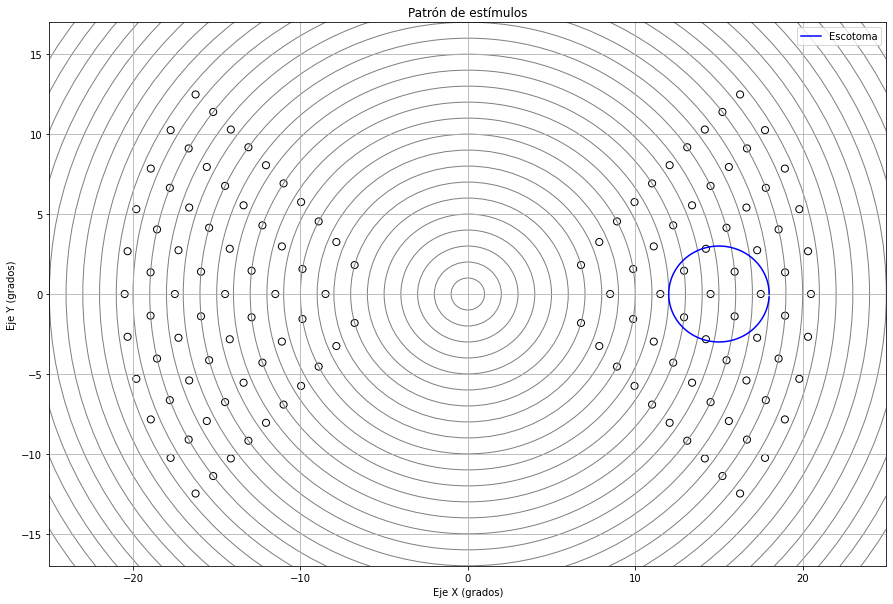

In [8]:
# Grafico el patrón
grafica_de_patron(Estimulos)

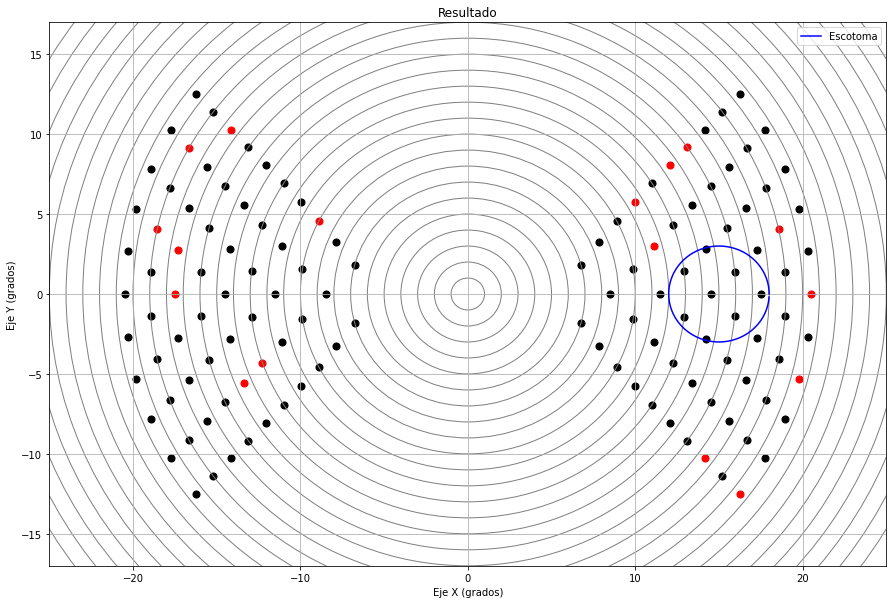

In [27]:
# Simulo una prueba y grafico los resultado
prueba1 = simulacion_prueba_inicial(Estimulos)
Resultado, estimulo_no_detectado = prueba1[0], prueba1[1]
grafica_resultado(Resultado)

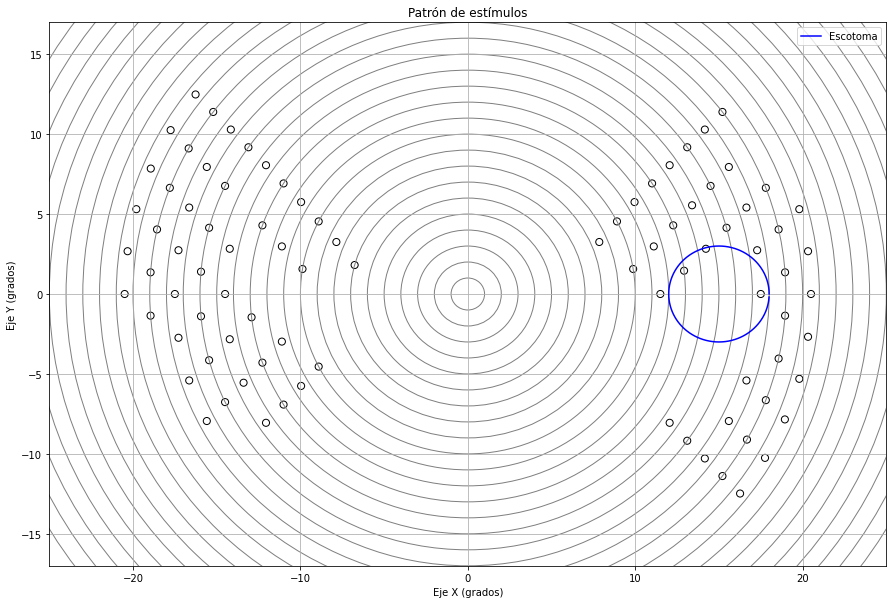

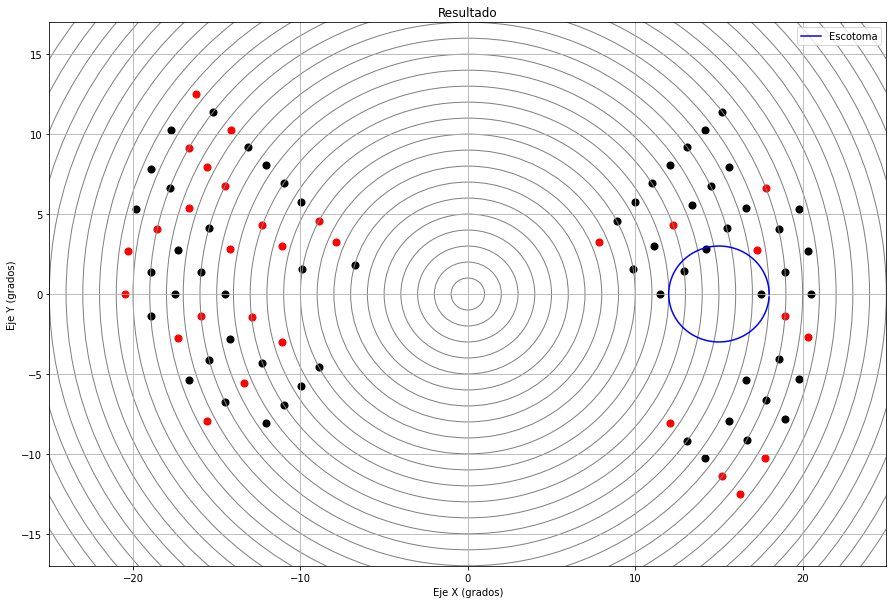

In [28]:
# limpio, genero el nuevo patrón y simulo una segunda prueba
patron_de_estimulos = analisis(Resultado)
grafica_de_patron(patron_de_estimulos)
prueba2 = simulacion_pruebas_siguientes(Resultado,patron_de_estimulos,estimulo_no_detectado)
Resultado2,Resultado,estimulo_no_detectado = prueba2[0],prueba2[1],prueba2[2]
grafica_resultado(Resultado2)

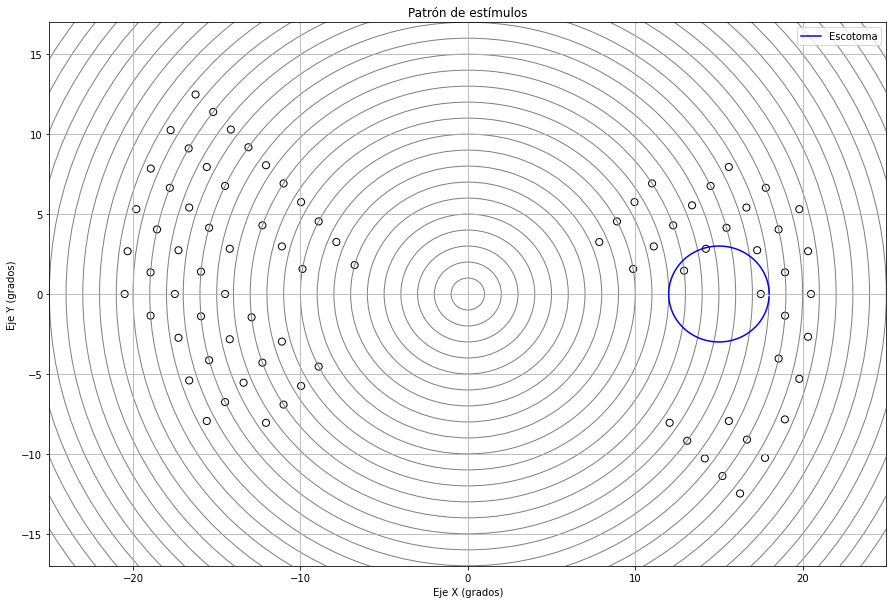

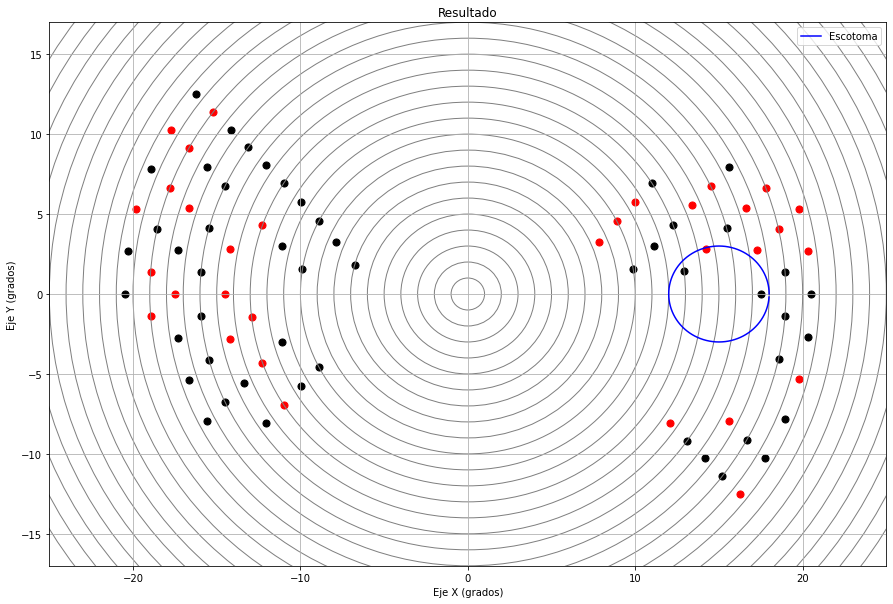

In [29]:
# limpio, genero el nuevo patrón y simulo una tercera prueba
patron_de_estimulos = analisis(Resultado2)
grafica_de_patron(patron_de_estimulos)
prueba3 = simulacion_pruebas_siguientes(Resultado,patron_de_estimulos,estimulo_no_detectado)
Resultado3,Resultado,estimulo_no_detectado = prueba3[0],prueba3[1],prueba3[2]
grafica_resultado(Resultado3)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


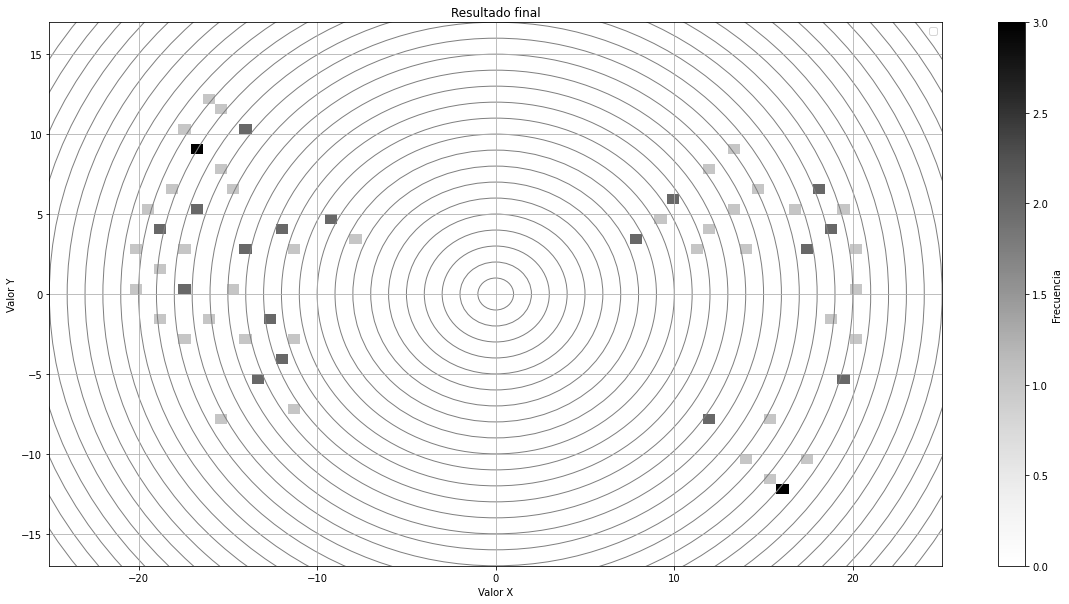

In [32]:
# Creo un mapa de calor del resultado final
resultado(estimulo_no_detectado)